In [112]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
import torch.nn.functional as F
from nltk.corpus import stopwords 
from collections import Counter
import string
import re
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
!pip install wget
import wget

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\92303\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\92303\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [113]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [114]:
path = 'IMDB Dataset.csv'
path1 = 'Test.csv'
df = pd.read_csv(path)
df1= pd.read_csv(path1)
dats = df[['sentiment']]
data.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [115]:
print(data.shape)

(50000, 2)


# Data Pre-processing

# 1. Coverts all the characters in text to lower case
# 2. Clean text by removing unnecessary characters and altering the format of   words.
# 3. Mapping of integers or characters to integers, strings
# 4. Removing Extra Space
# 5. Stemming and Lematization

In [116]:
def clean_text(df):
    all_reviews = list()
    lines = df["review"].values.tolist()
    for text in lines:
        #coverts all the characters in text to lower case
        text = text.lower()
        
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        
        emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols and pictographs
                           u"\U0001F680-\U0001F6FF"  # transport and map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text = emoji.sub(r'', text)
        #Clean text by removing unnecessary characters and altering the format of words.
        text = re.sub(r"i'm", "i am", text)
        text = re.sub(r"he's", "he is", text)
        text = re.sub(r"she's", "she is", text)
        text = re.sub(r"that's", "that is", text)        
        text = re.sub(r"what's", "what is", text)
        text = re.sub(r"where's", "where is", text) 
        text = re.sub(r"\'ll", " will", text)  
        text = re.sub(r"\'ve", " have", text)  
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"don't", "do not", text)
        text = re.sub(r"did't", "did not", text)
        text = re.sub(r"can't", "can not", text)
        text = re.sub(r"it's", "it is", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"have't", "have not", text)
        
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        tokens = word_tokenize(text)
        #str.maketrans builds a translation table, which is a mapping of integers or characters to integers, strings
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        words = ' '.join(words)
        all_reviews.append(words)
    return all_reviews

all_reviews = clean_text(df)
all_reviews[0:20]

['one of the other reviewers has mentioned that after watching just oz episode you will be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows would nt dare

In [117]:
df = pd.DataFrame(all_reviews)

In [118]:
df['sentiment'] = dats

In [119]:
df

,0,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there s a family where a little boy ...,negative
4,petter mattei s love in the time of money is a...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i am going to have to disagree with the previo...,negative


In [120]:
df.columns = ['review', 'sentiment']

In [121]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there s a family where a little boy ...,negative
4,petter mattei s love in the time of money is a...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i am going to have to disagree with the previo...,negative


### Splitting to train and test data

In [122]:
X,y = df['review'].values,df['sentiment'].values
#stratify=y
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(f'shape of train data is {x_train.shape}')
print(f'shape of test data is {x_test.shape}')

shape of train data is (40000,)
shape of test data is (10000,)


### EDA

In [123]:
def preprocess_string(review):
    """
    we tried to run the model with/without the removing of the html tags and urls. 
    the accruacy without removing them was better.with removing them the val_accrucay was 50%. 
    
    #Removing HTML tag from review
    
    clean = re.compile('<.*?>')
    review_without_tag = re.sub(clean, '', review) 
    
    
   
    #Removing URLs
    
    review_without_tag_and_url = re.sub(r"http\S+", "", review_without_tag)
    
    review_without_tag_and_url = re.sub(r"www\S+", "", review_without_tag)
    """   
    # Remove all non-word characters (everything except numbers and letters)
    review = re.sub(r"[^\w\s]", '', review)
    # Replace all runs of whitespaces with no space
    review = re.sub(r"\s+", '', review)
    # replace digits with no space
    review = re.sub(r"\d", '', review)
    return review

def clean_text(review):
    lowercase = review.lower().replace('\n', ' ')
    stripped_html = re.sub('<br />', ' ', lowercase)
    cleaned_punctuation = re.sub('[%s]'%re.escape(string.punctuation), '', stripped_html)
    return cleaned_punctuation


In [124]:
MAX_WORDS = 10000   
MAX_LEN = 200
word_count_dict = {}

for review in df['review'].values:
    cleaned_text = clean_text(review)
    for word in cleaned_text.split(' '):
        word_count_dict[word] = word_count_dict.get(word, 0) + 1
            
df_word_dict = pd.DataFrame(pd.Series(word_count_dict, name='count'))
df_word_dict = df_word_dict.sort_values(by='count', ascending=False)

df_word_dict = df_word_dict[:MAX_WORDS-2]     # 总共取前max_words-2个词
df_word_dict['word_id'] = range(2, MAX_WORDS)

word_id_dict = df_word_dict['word_id'].to_dict()

word_id_dict['<unknown>'] = 0
word_id_dict['<padding>'] = 1

df_word_dict.head(10)

,count,word_id
the,663832,2
and,320666,3
a,320543,4
of,288382,5
is,266892,6
to,266789,7
it,186209,8
in,184863,9
i,172413,10
this,149416,11


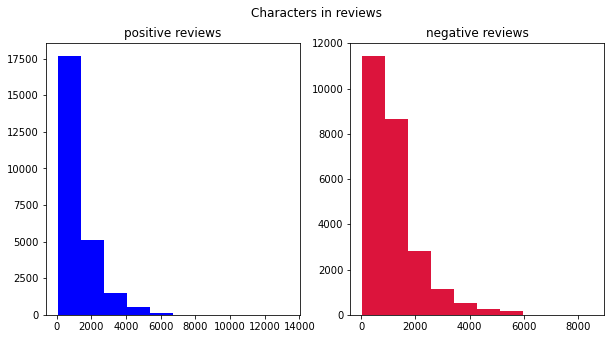

In [125]:
#Number of characters in reviews

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
review_len=df[df['sentiment']=="positive"]['review'].str.len()
ax1.hist(review_len,color='blue')
ax1.set_title('positive reviews')
review_len=df[df['sentiment']=="negative"]['review'].str.len()
ax2.hist(review_len,color='CRIMSON')
ax2.set_title('negative reviews')
fig.suptitle('Characters in reviews')
plt.show()

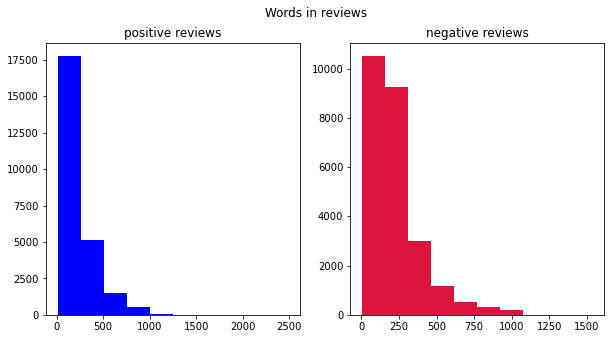

In [126]:
#Number of words in reviews
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
review_len=df[df['sentiment']=="positive"]['review'].str.split().map(lambda x: len(x))
ax1.hist(review_len,color='blue')
ax1.set_title('positive reviews')
review_len=df[df['sentiment']=="negative"]['review'].str.split().map(lambda x: len(x))
ax2.hist(review_len,color='CRIMSON')
ax2.set_title('negative reviews')
fig.suptitle('Words in reviews')
plt.show()

C:\Users\92303\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\92303\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each review')

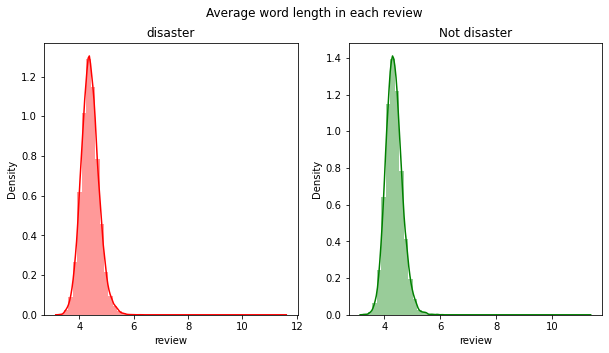

In [127]:
#Average word length in a review
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df[df['sentiment']=="positive"]['review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')
word=df[df['sentiment']=="negative"]['review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each review')

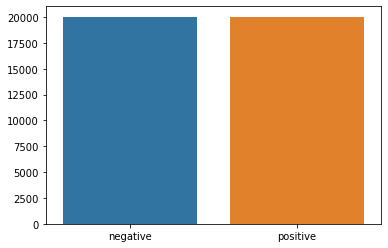

In [128]:
dd = pd.Series(y_train).value_counts()
sns.barplot(x=np.array(['negative','positive']),y=dd.values)
plt.show()

### Tockenization

In [129]:
def tockenize(x_train,y_train,x_val,y_val):
    word_list = []

    stop_words = set(stopwords.words('english')) 
    for sent in x_train:
        for word in sent.lower().split():
            word = preprocess_string(word)
            if word not in stop_words and word != '':
                word_list.append(word)
  
    corpus = Counter(word_list)
    # sorting on the basis of most common words
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:1000]
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}
    
    # tockenize
    final_list_train,final_list_test = [],[]
    for sent in x_train:
            final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() 
                                     if preprocess_string(word) in onehot_dict.keys()])
    for sent in x_val:
            final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() 
                                    if preprocess_string(word) in onehot_dict.keys()])
            
    encoded_train = [1 if label =='positive' else 0 for label in y_train]  
    encoded_test = [1 if label =='positive' else 0 for label in y_val] 
    return np.array(final_list_train), np.array(encoded_train),np.array(final_list_test), np.array(encoded_test),onehot_dict

*we can use this line of code in the cnn part !

In [130]:
x_train,y_train,x_test,y_test,vocab = tockenize(x_train,y_train,x_test,y_test)

<ipython-input-129-2c51ff4dadc1>:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(final_list_train), np.array(encoded_train),np.array(final_list_test), np.array(encoded_test),onehot_dict


In [131]:
print(f'Length of vocabulary is {len(vocab)}')

Length of vocabulary is 1000


### Analysing review length

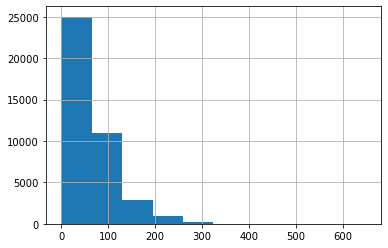

count    40000.000000
mean        68.163725
std         47.114109
min          0.000000
25%         39.000000
50%         53.000000
75%         83.000000
max        649.000000
dtype: float64

In [132]:
rev_len = [len(i) for i in x_train]
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()

# LSTM PART

### Padding

Padding each of the sequence to max length.

In [133]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

In [134]:
#we have very less number of reviews with length > 500.
#So we will consideronly those below it.
x_train_pad = padding_(x_train,500)
x_test_pad = padding_(x_test,500)

### Batching and loading as tensor

In [135]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))

# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

In [136]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample input: \n', sample_y)

Sample input size:  torch.Size([50, 500])
Sample input: 
 tensor([[  0,   0,   0,  ..., 317,  14, 242],
        [  0,   0,   0,  ...,  58,  15,   3],
        [  0,   0,   0,  ...,  94,   8,  97],
        ...,
        [  0,   0,   0,  ...,  16,  69, 318],
        [  0,   0,   0,  ..., 122, 636,   5],
        [  0,   0,   0,  ...,   9,   5,   1]], dtype=torch.int32)
Sample input: 
 tensor([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
        0, 1], dtype=torch.int32)


### Model

In [137]:
class Main_LSTM(nn.Module):
    def __init__(self,no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5):
        super(Main_LSTM,self).__init__()
 
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
 
        self.no_layers = no_layers
        self.vocab_size = vocab_size
    
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)
        
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
    
        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()
        
    def forward(self,x,hidden):
        batch_size = x.size(0)
        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True
        #print(embeds.shape)  #[50, 500, 1000]
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim) 
        
        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
        
        
        
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden

In [138]:
no_layers = 2
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 64
output_dim = 1
hidden_dim = 256


model = Main_LSTM(no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5)

#moving to gpu
model.to(device)

print(model)

Main_LSTM(
  (embedding): Embedding(1001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


### Training

In [139]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

In [ ]:
clip = 5
epochs = 5 
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    
    train_acc = 0.0
    model.train()
    # initialize hidden state 
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:
        
        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])
        
        model.zero_grad()
        output,h = model(inputs,h)
        
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
 
    
        
    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model(inputs, val_h)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())
            
            accuracy = acc(output,labels)
            val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), '../working/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')

In [ ]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()

In [ ]:
# Evaluation Function
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
def evaluate(model,valid_loader, version='title', threshold=0.5):
    y_pred = []
    y_true = []
    val_h = model.init_hidden(batch_size)
    model.eval()
    with torch.no_grad():
        for inputs, labels in valid_loader :
            
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model(inputs, val_h)

            output = (output > threshold).int()
            y_pred.extend(output.tolist())
            y_true.extend(labels.tolist())
    
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=[1,0], digits=4))
    
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

    ax.set_title('Confusion Matrix')

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

    ax.xaxis.set_ticklabels(['Negative', 'Positive'])
    ax.yaxis.set_ticklabels(['Negative', 'Positive'])
    
    
evaluate(model, valid_loader)

In [ ]:
def plot_auc_roc(model,valid_loader, version='title', threshold=0.5):
    y_pred = []
    y_true = []
    val_h = model.init_hidden(batch_size)
    model.eval()
    with torch.no_grad():
        for inputs, labels in valid_loader :
            
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model(inputs, val_h)

            output = (output > threshold).int()
            y_pred.extend(output.tolist())
            y_true.extend(labels.tolist())
    
    print('AUC ROC :')
    fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    

    #roc_auc = roc_auc_score(y_true, y_pred)
    print(roc_auc)
    print('----------------------------------------------------------')
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

plot_auc_roc(model, valid_loader) 

# Predicting the unlabeled datset

In [ ]:
outputs = list()
status = list()
for review in df1['Review'][:] :
    #print(text)
    word_seq = np.array([vocab[preprocess_string(word)] for word in review.split() 
                         if preprocess_string(word) in vocab.keys()])
    word_seq = np.expand_dims(word_seq,axis=0)
    pad =  torch.from_numpy(padding_(word_seq,500))
    inputs = pad.to(device)
    batch_size = 1
    h = model.init_hidden(batch_size)
    h = tuple([each.data for each in h])
    output, h = model(inputs, h)
    #print(output.item())
    pro = output.item()
    outputs.append(pro)


df1['outputs'] = outputs

In [ ]:
df1['outputs'] = df1['outputs'].astype(float)  
predicted_sentiment = list()
df1.head(10)
for i in df1['outputs'][:] : 
    if i < 0.5 : 
        predicted_sentiment.append('Negative') 
    else : 
        predicted_sentiment.append('Positive')

df1['predicted_sentiment'] = predicted_sentiment    
        
        
print(df1.shape)
print(df1['predicted_sentiment'].value_counts())

In [ ]:
df1_pos = df1[df1['predicted_sentiment']=='Positive']
df1_neg = df1[df1['predicted_sentiment']=='Negative']
print(df1_pos.shape)
print(df1_neg.shape)

# Wordclouds for predicted reviews

In [ ]:
import pandas as pd
import numpy as np

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from matplotlib.pyplot import figure

In [ ]:
STOPWORDS.add('https')  # remove htps to the world Cloud

def Plot_world(text):
    
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    
    for val in text: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 5000, height = 4000, 
                    background_color ='black', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (12, 12), facecolor = 'k', edgecolor = 'k' ) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

In [ ]:
text = df1_pos.Review.values

Plot_world(text)

In [ ]:
text = df1_neg.Review.values

Plot_world(text)

# single Predictions

In [ ]:
def predict_single_text(text):
        word_seq = np.array([vocab[preprocess_string(word)] for word in text.split() 
                         if preprocess_string(word) in vocab.keys()])
        word_seq = np.expand_dims(word_seq,axis=0)
        pad =  torch.from_numpy(padding_(word_seq,500))
        inputs = pad.to(device)
        batch_size = 1
        h = model.init_hidden(batch_size)
        h = tuple([each.data for each in h])
        output, h = model(inputs, h)
        return(output.item())

In [ ]:
index = 22
index_text = df['review'][index] 
print(df['review'][index])
print('='*70)
print(f'Actual sentiment is  : {df["sentiment"][index]}')
print('='*70)
pro = predict_single_text(df['review'][index])
status = "positive" if pro > 0.5 else "negative"
pro = (1 - pro) if status == "negative" else pro
print(f'Predicted sentiment is {status} with a probability of {pro}')

In [ ]:
index = 42
print(df['review'][index])
print('='*70)
print(f'Actual sentiment is  : {df["sentiment"][index]}')
print('='*70)
pro = predict_single_text(df['review'][index])
status = "positive" if pro > 0.5 else "negative"
pro = (1 - pro) if status == "negative" else pro
print(f'predicted sentiment is {status} with a probability of {pro}')

# CNN KERAS IMPLEMENTATION 

In [ ]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [ ]:
#truncate and pad input sequences
top_words = 5000
max_review_length = 500
X_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

In [ ]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
#model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
#model.add(LSTM(16))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
train_history = model.fit(X_train, y_train, epochs=6, batch_size=256)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
acc = train_history.history['accuracy']
loss = train_history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label=' accruacy')
plt.plot(epochs, loss, 'b', label='loss')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
y_pred = model.predict(X_test)

y_pred = y_pred.argmax(axis=-1)
y_test = y_test.argmax(axis=-1)

# CNN Pytorch implementation 

In [ ]:
import os
import sys
import random
import time
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import OrderedDict
import re, string
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader


!mkdir ./model_bakup/

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class CFG:
    batch_size = 20
    lr = 0.01
    eval_step_num = 300
    best_eval_acc = 0.0
    model_output_dir = './model_bakup/'
    seed = 2032
    
global_start_t = time.time()
print('ok')
#seed_everything(seed=42)

In [ ]:
def pad(data_list, pad_length):
    padded_list = data_list.copy()
    
    if len(data_list) > pad_length:
        padded_list = data_list[-pad_length:]
        
    if len(data_list) < pad_length:
        padded_list = [1] * (pad_length-len(data_list)) + data_list
        
    return padded_list

def text_to_token(text):
    cleaned_text = clean_text(text)
    word_token_list = [word_id_dict.get(word, 0) for word in cleaned_text.split(' ')]
    pad_list = pad(word_token_list, MAX_LEN)
    token = ' '.join([str(x) for x in pad_list])
    return token
            
process_start_t = time.time()
print('start processing...')
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df['review_tokens'] = df['review'].map(text_to_token)
print('ok, cost time: ', time.time()-process_start_t)
df.head(5)

In [ ]:
df_train = df.iloc[:15000]
df_valid = df.iloc[15000:20000]
df_test = df.iloc[20000:]
print(f'imdb_data_train.shape: {df_train.shape}, imdb_data_valid.shape: {df_valid.shape}, '
      f'imdb_data_test.shape: {df_test.shape}')

In [ ]:
glove_path = '../input/glove6b/glove.6B.100d.txt'

cnt = 0
word_2_vector_map = {}
with open(glove_path) as fin:
    for line in fin:
        line = line.strip()
        word = line.split()[0]
        vector = np.array([float(val) for val in line.split()[1:]])
        word_2_vector_map[word] = vector
        cnt += 1
print('cnt is', cnt, 'len of word_2_vector_map: ', len(word_2_vector_map))

embed_size = 100
glove6b_100d_weight = torch.zeros(len(word_id_dict), embed_size)

for word, idx in word_id_dict.items():
    try:
        vector = word_2_vector_map[word]
    except:
        print('not found in : ', word)
        continue
    glove6b_100d_weight[idx, :] = torch.from_numpy(vector)
    
print('glove6b_100d_weight.shape: ', glove6b_100d_weight.shape)

In [ ]:
cfg = CFG()
#seed_everything(seed=cfg.seed)

print('ok')

In [ ]:
class imdbDataset(Dataset):
    def __init__(self, data_df):
        self.data_df = data_df
        
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        label = self.data_df.iloc[index]['sentiment']
        label = torch.tensor([float(label)], dtype=torch.float, device=device)
        
        tokens = self.data_df.iloc[index]['review_tokens']
        feature = torch.tensor([int(x) for x in tokens.split(' ')], dtype=torch.long, device=device)
            
        return feature, label
    
def generate_data_iter(cfg):
    global df_train, df_valid, df_test
    ds_train = imdbDataset(df_train)
    ds_valid = imdbDataset(df_valid)
    ds_test = imdbDataset(df_test)
    print('len of ds_train: ', len(ds_train), 'len of ds_valid: ', len(ds_valid),
          'len of ds_test: ', len(ds_test))

    dl_train = DataLoader(ds_train, batch_size=cfg.batch_size, shuffle=True, num_workers=0)
    dl_valid = DataLoader(ds_valid, batch_size=cfg.batch_size, shuffle=False, num_workers=0)
    dl_test = DataLoader(ds_test, batch_size=cfg.batch_size, shuffle=False, num_workers=0)
    return dl_train, dl_valid, dl_test

dl_train, dl_valid, dl_test = generate_data_iter(cfg)
print('ok')

In [ ]:
class CNN_Net(nn.Module):
    def __init__(self):
        global glove6b_100d_weight
        super().__init__()
        
        #self.embedding = nn.Embedding(num_embeddings=MAX_WORDS, embedding_dim=3, padding_idx=1)
        self.embedding = nn.Embedding.from_pretrained(glove6b_100d_weight, freeze=False)
        assert self.embedding.weight.requires_grad==True, 'should be True, because freeze=False'
        
        self.conv = nn.Sequential()
        self.conv.add_module('conv_1', nn.Conv1d(in_channels=100, out_channels=16, kernel_size=5))
        self.conv.add_module('pool_1', nn.MaxPool1d(kernel_size=2))
        self.conv.add_module('relu_1', nn.ReLU())
        self.conv.add_module('conv_2', nn.Conv1d(in_channels=16, out_channels=128, kernel_size=2))
        self.conv.add_module('pool_2', nn.MaxPool1d(kernel_size=2))
        self.conv.add_module('relu_2', nn.ReLU())
        
        self.dense = nn.Sequential()
        self.dense.add_module('flatten', nn.Flatten())
        self.dense.add_module('linear', nn.Linear(6144, 1))
        self.dense.add_module('sigmoid', nn.Sigmoid())
        
    def forward(self, x):
        x = self.embedding(x).transpose(1, 2)
        x = self.conv(x)
        y = self.dense(x)
        return y
    
model = CNN_Net()
print(model)
model.to(device)     

print('ok')

In [ ]:
def accuracy(y_pred, y_true):
    if type(y_pred)==list:
        y_pred = np.array(y_pred)
    y_pred = (y_pred > 0.5)
    if type(y_true)==list:
        y_true = np.array(y_true)
    acc = (y_pred==y_true).mean()
    return acc

def evaluate(model, dl_test, device):
    global cfg
    model.eval()
    
    y_true_lst, y_pred_lst = [], []
    with torch.no_grad():
        for step, batch in tqdm(enumerate(dl_test)):
            feature, label = batch
            feature, label = feature.to(device), label.to(device)
            y_pred = model(feature)
            y_pred_lst += list(y_pred.detach().cpu().numpy())
            y_true_lst += list(label.detach().cpu().numpy())
            
    model.train() 
    acc = accuracy(y_pred_lst, y_true_lst)

    return acc
    
def train(model, dl_train, optimizer, loss_func, device):
    global cfg, global_step_num
    model.train()  
    
    y_true_lst, y_pred_lst = [], []
    #pbar = ProgressBar(n_total=len(dl_train), desc='Training')
    
    for step, batch in tqdm(enumerate(dl_train)):
        global_step_num += 1
        feature, label = batch
        feature, label = feature.to(device), label.to(device)
        #print('in train(), feature.shape:', feature.shape, 'label.shape: ', label.shape)
        y_pred = model(feature)
        train_loss = loss_func(y_pred, label)
        y_pred_lst += list(y_pred.detach().cpu().numpy())
        y_true_lst += list(label.detach().cpu().numpy())
        train_loss.backward()
        optimizer.step()
        model.zero_grad()
        
    print('in train(), len(dl_train): ', len(dl_train))
        
    acc = accuracy(y_pred_lst, y_true_lst)
    return acc

print('ok')

In [ ]:
global_best_train_acc, global_best_valid_acc = 0.0, 0.0
global_train_acc = 0.0
global_step_num = 0

epochs = 6
# optimizer=torch.optim.Adagrad(model.parameters(), lr=cfg.lr)
optimizer=torch.optim.Adam(model.parameters(), lr=cfg.lr)
loss_func = nn.BCELoss()

for epoch in range(epochs):
    train_acc = train(model, dl_train, optimizer, loss_func, device)
    valid_acc = evaluate(model, dl_valid, device)
    test_acc = evaluate(model, dl_test, device)
    print(f'in epoch: {epoch}, train_acc: {train_acc:.5f}, valid_acc: {valid_acc:.5f}, test_acc: {test_acc:.5f}')
    if train_acc > global_best_train_acc:
        global_best_train_acc = train_acc
    if valid_acc > global_best_valid_acc:
        global_best_valid_acc = valid_acc
        global_train_acc = train_acc
        print(f'get new best_valid_acc: {global_best_valid_acc:.5f}, save the model now!')
        torch.save(model.state_dict(), os.path.join(cfg.model_output_dir, 'best_step_model.pth'))

In [ ]:
model = CNN_Net()
model.to(device)

model.load_state_dict(torch.load(os.path.join(cfg.model_output_dir, 'best_step_model.pth')))
test_acc = evaluate(model, dl_test, device)
print(f'final test_acc: {test_acc:.5f}, best_val_acc: {global_best_valid_acc:.5f}, '
      f'train_acc: {global_train_acc:.5f}, best_train_acc: {global_best_train_acc:.5f}')

print('total finished, cost time: ', time.time() - global_start_t)